In [1]:
import pandas as pd
from text_normalization import *
from textblob import TextBlob
import plotly.graph_objects as go

/Users/brendaduan/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brendaduan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brendaduan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/brendaduan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brendaduan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
##loading data
df = pd.read_csv('result.csv')
df['date']=pd.to_datetime(df['datetime']).dt.date
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,datetime,user_followers,polarity,subjectivity,date,sim_num,tweets_num,...,"('http', 104)","('btc', 67)","('bitcoin', 66)","('crypto', 24)","('price', 17)","('eth', 13)","('hour', 10)","('binance', 8)","('ethereum', 8)",final_score
0,0,0,0,2021-02-05,4548.698347,0.088654,0.269247,2021-02-05,108,5865,...,1714,1181,1206,380,208,231,92,60,136,0.125101
1,1,1,1,2021-02-06,5057.975290,0.089406,0.254639,2021-02-06,263,5646,...,3144,2477,2287,574,446,448,176,130,174,0.121094
2,2,2,2,2021-02-07,3971.020792,0.104879,0.278468,2021-02-07,221,5102,...,3000,1891,1854,579,414,368,175,148,183,0.135980
3,3,3,3,2021-02-08,8519.301452,0.094760,0.267916,2021-02-08,426,4708,...,5137,4535,4760,1122,571,440,247,212,242,0.127755
4,4,4,4,2021-02-09,7326.900000,0.094839,0.269521,2021-02-09,300,4651,...,4196,3180,3253,641,543,456,275,176,227,0.128276


In [3]:
##load bitcoin price datasets
df_coin = pd.read_csv("BTC-USD.csv")
df_coin['Date']=pd.to_datetime(df_coin['Date']).dt.date

In [4]:
df_coin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
1,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
3,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
4,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886


In [5]:
##define plot function which can plot two line in one plot

import plotly.graph_objects as go
from plotly.subplots import make_subplots

def Plot(df1,x1,y1,df2,x2,y2,title,y1_title,y2_title):
    """
    input:
        df1 -  the name of the first dataframe
        x1 - str, the name of df1 column as x1-axis
        y1 - str, the name of df1 column as y1-axis
        df2 - second datafram
        x2 - str, the name of df2 column as x2-axis
        y2 - str, the name of df1 column as y2-axis
        
        titile - str, name of title 
        y1_title - str, label the y1-axis
        y2_title - str, label the y2-axis
        
    """
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    # Add traces
    fig.add_trace(
    go.Scatter(x=df1[x1], y=df1[y1], name=y1_title),
    secondary_y=False,
)
    fig.add_trace(
    go.Scatter(x=df2[x2], y=df2[y2], name=y2_title),
    secondary_y=True,
)
    # Add figure title
    fig.update_layout(
    title_text=title
)
# Set x-axis title
#fig.update_xaxes(title_text="xaxis title")

# Set y-axes titles
    fig.update_yaxes(title_text=y1_title, secondary_y=False)
    fig.update_yaxes(title_text=y2_title, secondary_y=True)
    fig.show()
    

In [32]:
df['final_score'] = df['user_followers']*0.001 + df['polarity']*0.5 + df['subjectivity']*0.3 - df['sim_num']*0.01

In [33]:
Plot(df,"date","final_score",df_coin,"Date","Close","title","final_score","bitcoin price")

In [7]:
## loading datasets with polarity and subjectivity
df_tweets = pd.read_csv("datasets_with_polarity.csv")

In [8]:
tweets = df_tweets["clean_text"].values

In [9]:
#tweets= tweets[:100]

In [10]:
##bag of words, find the frequency of each word in datasets

from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer

pos_words=[]
tokenizer = RegexpTokenizer('\S+')
for words in tweets:
    pos_words.extend(tokenizer.tokenize(words))
    
freqG = nltk.FreqDist(pos_words)

<>:7: DeprecationWarning:

invalid escape sequence \S

<>:7: DeprecationWarning:

invalid escape sequence \S

<>:7: DeprecationWarning:

invalid escape sequence \S

<ipython-input-10-b7ee3fff5193>:7: DeprecationWarning:

invalid escape sequence \S



In [11]:
## find the most common 10 words
common_words = freqG.most_common(10)

In [12]:
## group dataframe by date, it divided tweets into different days
tweet_per_day = df_tweets.groupby(['datetime'])['clean_text'].apply(list).values

In [13]:
## given the keyword and tweets, return the frequency of word in the tweets
def frequency_word_per_day(tweets_day,keyword):
    wordslist=[]
    tokenizer = RegexpTokenizer('\S+')
    for words in tweets_day:
        wordslist.extend(tokenizer.tokenize(words))
    
    freqw = nltk.FreqDist(wordslist)
    if keyword in freqw.keys():
        return (freqw[keyword])
    else:
        return(0)

<>:4: DeprecationWarning:

invalid escape sequence \S

<>:4: DeprecationWarning:

invalid escape sequence \S

<>:4: DeprecationWarning:

invalid escape sequence \S

<ipython-input-13-686fe2b83072>:4: DeprecationWarning:

invalid escape sequence \S



In [14]:
##test
frequency_word_per_day(tweet_per_day[0],'zzz')

0

In [15]:
## common words is a list of tuple, the numer show the frequency of word occure in the whole datasets
common_words 

[('co', 98612),
 ('http', 96994),
 ('btc', 95805),
 ('bitcoin', 90364),
 ('crypto', 28107),
 ('price', 21807),
 ('eth', 16221),
 ('cryptocurrency', 15120),
 ('buy', 9518),
 ('ethereum', 9199)]

In [16]:
freq_words = []
for word in common_words:
    freq_word = []
    for tweets in tweet_per_day:
        freq = frequency_word_per_day(tweets,word[0])
        freq_word.append(freq)
    freq_words.append(freq_word)
    

In [17]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,datetime,user_followers,polarity,subjectivity,date,sim_num,tweets_num,"('co', 106)","('http', 104)","('btc', 67)","('bitcoin', 66)","('crypto', 24)","('price', 17)","('eth', 13)","('hour', 10)","('binance', 8)","('ethereum', 8)"
0,0,0,0,2021-02-05,4548.698347,0.088654,0.269247,2021-02-05,108,5865,1736,1714,1181,1206,380,208,231,92,60,136
1,1,1,1,2021-02-06,5057.975290,0.089406,0.254639,2021-02-06,263,5646,3168,3144,2477,2287,574,446,448,176,130,174
2,2,2,2,2021-02-07,3971.020792,0.104879,0.278468,2021-02-07,221,5102,3028,3000,1891,1854,579,414,368,175,148,183
3,3,3,3,2021-02-08,8519.301452,0.094760,0.267916,2021-02-08,426,4708,5178,5137,4535,4760,1122,571,440,247,212,242
4,4,4,4,2021-02-09,7326.900000,0.094839,0.269521,2021-02-09,300,4651,4241,4196,3180,3253,641,543,456,275,176,227


In [18]:
## add key words frequency to dataframe result
for i,word in enumerate(common_words):
    df[word] = freq_words[i]

In [19]:
##save result
df.to_csv("results.csv")

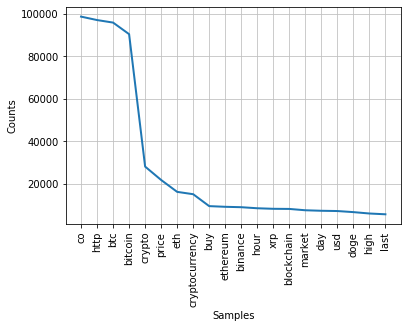

In [20]:
freqG.plot(20) 

In [21]:
##remove the keyword in sentence
def remove_keyword(sentence,keyword):
    """
    input: 
        sentence: str
        keyword: str
    output:
        sentence after removing keyword
    
    """
    new_tweets = []
    tokenizer = RegexpTokenizer('\S+')
    test = tokenizer.tokenize(t)
    for word in test:
        i = 0
        if i>0 and word == keyword:
            continue
        elif word == key_word:
            new_tweets.append(word)
            i+=1
        else:
            new_tweets.append(word)
    sentence = " ".join(new_tweets)
    
    return sentence

<>:12: DeprecationWarning:

invalid escape sequence \S

<>:12: DeprecationWarning:

invalid escape sequence \S

<>:12: DeprecationWarning:

invalid escape sequence \S

<ipython-input-21-5daad38cd8ab>:12: DeprecationWarning:

invalid escape sequence \S



In [22]:
#remove_keyword(t,"blue")